### The structure of the notebook is as follows:

1. Libraries Imported
2. Training dataset imported and categorical columns one-hot encoded (EXCEPT cat10)
3. Test dataset imported and categorical columns one-hot encoded (EXCEPT cat10)
4. cat10 column is extracted, merged, one-hot encoded, split and merged with original datasets (refer code for more details)

### (1) Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('libraries imported')

libraries imported


### (2) Training dataset

#### Downloading the dataset

(Make sure to change the file path when you run it on your systems)

In [2]:
train_set = pd.read_csv("/Users/fede.dicerbo/Desktop/practical2/train.csv", header=0)
print ('train data imported')

train data imported


In [3]:
train_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
train_set_copy = train_set #making a copy of the dataset to work with
train_set_copy.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [5]:
#removing the features from the target
y_train = train_set_copy[["target"]] #y_train contains the target
y_train.head()

,target
0,0
1,0
2,0
3,0
4,1


In [6]:
X_train = train_set_copy #X_train contains all the features
X_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [7]:
X_train.drop('target', axis=1, inplace=True) #removing target from features
X_train.drop('id', axis=1, inplace=True)     #removing id column
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,I,A,B,B,BI,A,S,Q,A,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,A,I,A,A,E,BI,K,W,AD,F,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,A,K,A,A,E,BI,A,E,BM,L,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,A,I,G,B,E,BI,C,G,Q,A,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [9]:
#IGNORE THIS CELL

#code used to perform one-hot encoding for a single column 

# X_train = pd.concat([X_train,pd.get_dummies(X_train['cat0'], prefix='cat0')],axis=1)
# X_train.drop('cat0', axis = 1, inplace = True)
# X_train.head()

In [10]:
%%time

#using a loop to convert all categorical columns EXCEPT cat10 
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    X_train = pd.concat([X_train,pd.get_dummies(X_train[col], prefix=col)],axis=1)
    X_train.drop(col, axis = 1, inplace = True)

CPU times: user 3.96 s, sys: 2.27 s, total: 6.23 s
Wall time: 7.16 s


In [11]:
X_train.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LO,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,...,0,1,0,0,0,1,0,1,0,0
1,HJ,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,...,0,0,0,0,0,1,0,1,0,0
2,DJ,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,...,0,1,0,0,0,1,0,1,0,0
3,KV,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,...,0,1,0,0,0,1,0,1,0,0
4,DP,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,...,0,0,0,0,0,1,0,1,0,0


### (3) Test dataset

#### Downloading the dataset

(Make sure to change the file path before running the following lines of code on your systems)

In [12]:
#importing test dataset
test_set = pd.read_csv("/Users/fede.dicerbo/Desktop/practical2/test.csv", header=0)
print ('test data imported')

test data imported


In [13]:
test_set_copy = test_set #making a copy of the test dataset to work with

In [14]:
test_set_copy.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [15]:
X_test = test_set_copy                       #saving all the features in X_test
X_test.drop('id', axis = 1, inplace = True)  #dropping the id column
X_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [16]:
%%time

#using get_dummies() to one-hot encode all categorical columns EXCEPT cat10
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    X_test = pd.concat([X_test,pd.get_dummies(X_test[col], prefix=col)],axis=1)
    X_test.drop(col, axis = 1, inplace = True)

CPU times: user 2.61 s, sys: 1.44 s, total: 4.05 s
Wall time: 4.21 s


In [17]:
X_test.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LF,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,...,0,1,0,0,0,1,0,1,0,0
1,MC,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,...,0,0,0,0,0,1,0,1,0,0
2,FN,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,...,0,1,0,0,0,1,0,1,0,0
3,HK,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,...,0,1,0,1,0,0,0,1,0,0
4,HX,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,...,0,1,0,0,0,1,0,1,0,0


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 336 entries, cat10 to cat18_D
dtypes: float64(11), object(1), uint8(324)
memory usage: 80.1+ MB


### (4) Dealing with cat10 column

Using describe() it was clear that cat10 had 4 extra values in the training dataset, but not in the test dataset.
On further analysis, it was discovered that this column also had values in the test dataset that were not present
in the training dataset. For this reason the following lines of code extracts the cat10 column from both datasets,
merges the rows, performs one-hot encoding, separates the rows and merges the encoded columns back with the two
datasets.


In [19]:
cat10_train = X_train['cat10']  #extracting the cat10 column from training dataset
cat10_train.value_counts()      

DJ    31584
HK    30998
DP    23679
GS    16619
CR    14382
      ...  
FW        1
CX        1
IL        1
BA        1
ML        1
Name: cat10, Length: 299, dtype: int64

<font color = DeepPink> Note: the total number of values in the training dataset is <b>299</b> </font>

In [20]:
cat10_test = X_test['cat10']  #extracting the cat10 column from test dataset 
cat10_test.value_counts()

DJ    21166
HK    20559
DP    15732
GS    10992
CR     9559
      ...  
MR        1
LH        1
IP        1
GY        1
ML        1
Name: cat10, Length: 295, dtype: int64

<font color = DeepPink> Note: the total number of values in the test dataset is <b>295</b> </font>

#### To check first row of test set after merging

An additional step to check if the first row of the test dataset matches with the final test dataset,
after the merge and separation.

In [21]:
test_set_copy.head(1) #first row of test dataset

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489


In [22]:
after_merge = test_set_copy.iloc[0:1, :]  #saving the first row of test dataset in after_merge
after_merge.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489


In [23]:
%%time

#one-hot encoding the first row of the test dataset INCLUDING cat10
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    after_merge = pd.concat([after_merge,pd.get_dummies(after_merge[col], prefix=col)],axis=1)
    after_merge.drop(col, axis = 1, inplace = True)



CPU times: user 66.3 ms, sys: 3.82 ms, total: 70.2 ms
Wall time: 137 ms


In [24]:
after_merge.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_A,cat10_LF,cat11_A,cat12_A,cat13_A,cat14_A,cat15_B,cat16_D,cat17_D,cat18_B
0,0.70812,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,1,1,1,1,1,1,1,1,1,1


#### Merging the two cat10 columns and One-Hot Encoding of the same

<font color = orange> Details of cat10 column in training dataset </font>

In [25]:
len(cat10_train) #number of rows in the training dataset

300000

In [26]:
cat10_train.head(1)  #first row of the training dataset

0    LO
Name: cat10, dtype: object

In [27]:
print(cat10_train.iloc[[299999]]) # last row of the training dataset

299999    LM
Name: cat10, dtype: object


<font color = orange> Details of cat10 column in test dataset </font>

In [28]:
len(cat10_test) #number of rows in test dataset

200000

In [29]:
cat10_test.head(1) #first row of the test dataset

0    LF
Name: cat10, dtype: object

<font color = orange> Combining the rows of the two columns </font>

In [30]:
cat10_combined = pd.concat([cat10_train, cat10_test]) # cat10_combined contains the cat10 columns from the two datasets
len(cat10_combined)

500000

In [31]:
print(cat10_combined.iloc[[300000]]) #first row of test dataset

0    LF
Name: cat10, dtype: object


<font color = orange> One-hot encoding </font>

In [32]:
cat10_encoded = pd.get_dummies(cat10_combined, prefix='cat10') #cat10_encoded contains the encoded columns
cat10_encoded.head()

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
len(cat10_encoded) #checking if any rows are missing

500000

In [34]:
print(cat10_encoded.iloc[[300000]]) #first row of test dataset

   cat10_AA  cat10_AB  cat10_AC  cat10_AD  cat10_AE  cat10_AF  cat10_AG  \
0         0         0         0         0         0         0         0   

   cat10_AH  cat10_AJ  cat10_AK  ...  cat10_O  cat10_P  cat10_Q  cat10_R  \
0         0         0         0  ...        0        0        0        0   

   cat10_S  cat10_T  cat10_V  cat10_W  cat10_X  cat10_Y  
0        0        0        0        0        0        0  

[1 rows x 307 columns]


In [35]:
print(cat10_encoded.iloc[[299999]]) #last row of training dataset

        cat10_AA  cat10_AB  cat10_AC  cat10_AD  cat10_AE  cat10_AF  cat10_AG  \
299999         0         0         0         0         0         0         0   

        cat10_AH  cat10_AJ  cat10_AK  ...  cat10_O  cat10_P  cat10_Q  cat10_R  \
299999         0         0         0  ...        0        0        0        0   

        cat10_S  cat10_T  cat10_V  cat10_W  cat10_X  cat10_Y  
299999        0        0        0        0        0        0  

[1 rows x 307 columns]


<font color = orange> Separating the test data (rows) from training data </font>

In [36]:
new_cat10_train = cat10_encoded.iloc[0:300000,:]   #contains 300000 rows of training data
new_cat10_test = cat10_encoded.iloc[300000:,:]     #contains 200000 rows of test data

In [37]:
len(new_cat10_train) #checking the number of rows of training dataset (after split)

300000

In [38]:
new_cat10_train.tail(1) #last row of training dataset

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
299999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
len(new_cat10_test) #checking the number of rows of test dataset (after split)

200000

In [40]:
new_cat10_test.head(1) #first row of test dataset

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combining the encoded columns with original datasets

#### Training dataset

In [41]:
X_train.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LO,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,...,0,1,0,0,0,1,0,1,0,0
1,HJ,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,...,0,0,0,0,0,1,0,1,0,0
2,DJ,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,...,0,1,0,0,0,1,0,1,0,0
3,KV,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,...,0,1,0,0,0,1,0,1,0,0
4,DP,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,...,0,0,0,0,0,1,0,1,0,0


In [42]:
X_train.drop('cat10', axis = 1, inplace = True)  #removing the cat10 column from the features
X_train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,1,0,0,0,1,0,1,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,1,0,1,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,1,0,0,0,1,0,1,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,1,0,0,0,1,0,1,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,1,0,1,0,0


#### Merging the encoded columns with training dataset

In [43]:
X_train_final = pd.concat([X_train, new_cat10_train], axis = 1)
X_train_final.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,0,0,0,0,0,0,0,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,0,0,0,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,0,0,0,0,0,0,0,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,0,0,0,0,0,0,0,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,0,0,0,0,0


In [44]:
len(X_train_final) #checking number of rows of training dataset

300000

#### Test dataset

In [45]:
X_test.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LF,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,...,0,1,0,0,0,1,0,1,0,0
1,MC,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,...,0,0,0,0,0,1,0,1,0,0
2,FN,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,...,0,1,0,0,0,1,0,1,0,0
3,HK,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,...,0,1,0,1,0,0,0,1,0,0
4,HX,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,...,0,1,0,0,0,1,0,1,0,0


In [46]:
X_test.drop('cat10', axis = 1, inplace = True) #dropping cat10 column from the features
X_test.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,0,1,0,0,0,1,0,1,0,0
1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,...,0,0,0,0,0,1,0,1,0,0
2,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,...,0,1,0,0,0,1,0,1,0,0
3,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,...,0,1,0,1,0,0,0,1,0,0
4,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,...,0,1,0,0,0,1,0,1,0,0


#### Merging the encoded columns with test dataset

In [47]:
X_test_final = pd.concat([X_test, new_cat10_test], axis = 1)
X_test_final.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,0,0,0,0,0,0,0,0,0,0
1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,...,0,0,0,0,0,0,0,0,0,0
2,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,...,0,0,0,0,0,0,0,0,0,0
3,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,...,0,0,0,0,0,0,0,0,0,0
4,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,...,0,0,0,0,0,0,0,0,0,0


In [48]:
len(X_test_final) #checking number of rows in test dataset

200000

In [49]:
#SGDClassifier - binary
#‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. 

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='modified_huber', max_iter=1000, tol=1, random_state=123)

In [50]:
%%time
sgd_clf.fit(X_train_final, y_train.values.ravel())

CPU times: user 6.65 s, sys: 3.23 s, total: 9.88 s
Wall time: 12.7 s


SGDClassifier(loss='modified_huber', random_state=123, tol=1)

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_final, y_train.values.ravel(), cv=5, scoring="accuracy")

array([0.82663333, 0.83205   , 0.8295    , 0.8358    , 0.84051667])

In [52]:
%%time
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_final, y_train.values.ravel(), cv=5)
y_train_pred

CPU times: user 30.1 s, sys: 6.88 s, total: 37 s
Wall time: 39.4 s


array([0, 0, 0, ..., 1, 0, 0])

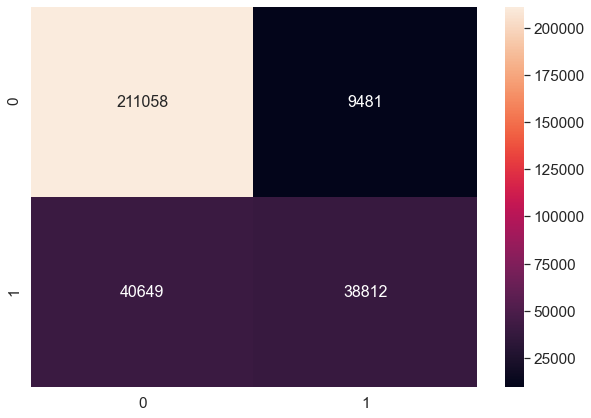

In [53]:
#Confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred) 

0.8036775516120349

In [55]:
#Sensitivity, True Positive Rate, Recall
recall_score(y_train, y_train_pred) 

0.48844087036407796

In [56]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.607605241323168

In [57]:
y_scores = cross_val_predict(sgd_clf, X_train_final, y_train, cv=5, method="predict") #decison_function not supported

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

In [58]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
recall_60_precision = recalls[np.argmax(precisions >= 0.60)]

In [59]:
#ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

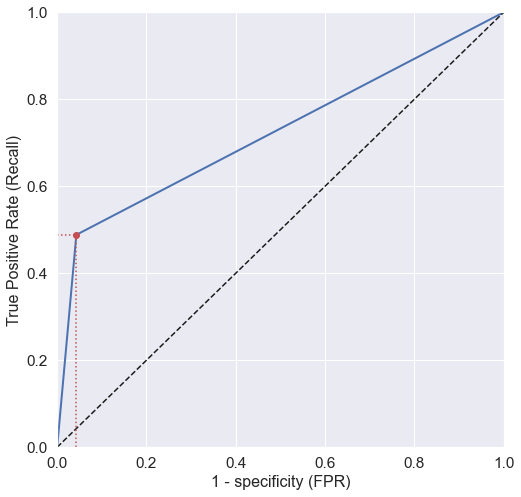

In [60]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('1 - specificity (FPR)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            
    
plt.figure(figsize=(8, 8))                                    
plot_roc_curve(fpr, tpr)
fpr_60 = fpr[np.argmax(tpr >= recall_60_precision)]           
plt.plot([fpr_60, fpr_60], [0., recall_60_precision], "r:")   
plt.plot([0.0, fpr_60], [recall_60_precision, recall_60_precision], "r:")  
plt.plot([fpr_60], [recall_60_precision], "ro")                                                  
plt.show()

In [61]:
# Principal Component Analysis to reduce dataset dimensionality

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_final_rescaled = scaler.fit_transform(X_train_final)

In [63]:
#How many components to keep? Let's keep n. of components explaining something between 70% and 90% of the total variance

from sklearn.decomposition import PCA

pca = PCA(n_components = 642)
pca.fit(X_train_final_rescaled)

PCA(n_components=642)

In [64]:
#Decreasing proportion of variance explained by each component (extracted from the correlation matrix because of scaled dataset)
pca.explained_variance_ratio_

array([1.14181043e-01, 5.46485446e-02, 4.81117034e-02, 4.75902912e-02,
       3.62833323e-02, 3.36250905e-02, 3.02815885e-02, 2.43394799e-02,
       2.37947919e-02, 2.14079844e-02, 2.10436891e-02, 1.84368175e-02,
       1.67005897e-02, 1.61667911e-02, 1.50687281e-02, 1.35635652e-02,
       1.30638092e-02, 1.20036465e-02, 1.16089230e-02, 1.08113554e-02,
       1.04726525e-02, 1.01209132e-02, 9.71395622e-03, 9.20779812e-03,
       8.79839683e-03, 8.61683245e-03, 8.29288905e-03, 8.18203248e-03,
       7.96406367e-03, 7.44818240e-03, 7.26740119e-03, 6.89398734e-03,
       6.69874070e-03, 6.32801599e-03, 6.14160048e-03, 5.99923845e-03,
       5.79642803e-03, 5.53736407e-03, 5.37748252e-03, 5.31709612e-03,
       5.10236775e-03, 5.02733087e-03, 4.93974352e-03, 4.76392319e-03,
       4.68955020e-03, 4.61599815e-03, 4.56851928e-03, 4.44976736e-03,
       4.36502032e-03, 4.26654140e-03, 4.16095442e-03, 4.13605192e-03,
       4.03883258e-03, 3.90388822e-03, 3.78666009e-03, 3.75992711e-03,
      

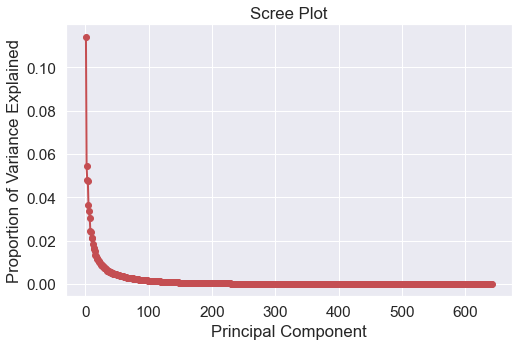

In [65]:
#Scree Plot
plt.figure(figsize=(8,5))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [66]:
#How many components account for at least 70% of total variance?
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.70) + 1

In [67]:
d

35

In [68]:
#How many components account for at least 90% of total variance?
cumsum = np.cumsum(pca.explained_variance_ratio_)
e = np.argmax(cumsum >= 0.90) + 1

In [69]:
e

96

In [70]:
#Choice: retain 72 components which explain 85% of total variance of our final scaled training set
cumsum = np.cumsum(pca.explained_variance_ratio_)
f = np.argmax(cumsum >= 0.80) + 1

In [71]:
f

56

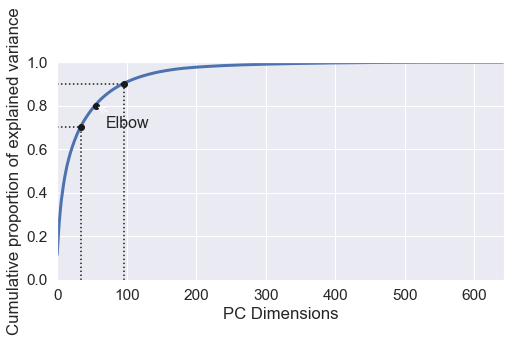

In [72]:
plt.figure(figsize=(8,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 642, 0, 1])
plt.xlabel("PC Dimensions")
plt.ylabel("Cumulative proportion of explained variance")
plt.plot([d, d], [0, 0.70], "k:")
plt.plot([0, d], [0.70, 0.70], "k:")
plt.plot(d, 0.70, "ko")

plt.plot([e, e], [0, 0.90], "k:")
plt.plot([0, e], [0.90, 0.90], "k:")
plt.plot(e, 0.90, "ko")

plt.plot(f, 0.80, "ko")
plt.annotate("Elbow", xy=(56, 0.80), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [73]:
#We retain 56 dimensions, dropping  570, on different set of axes. This tool is useful to hypothesis testing and data visualisation rather than model fitting.

In [74]:
pca_56 = PCA(n_components=0.80)
Xtrain_reduced = pca_56.fit_transform(X_train_final_rescaled)

In [75]:
Xtrain_reduced.shape

(300000, 56)

In [76]:
#Confusion matrix on the new reduced PCA training set to check whether PCA helps improve the outcome of a binary classifier

In [77]:
sgd_clf.fit(Xtrain_reduced, y_train.values.ravel())

SGDClassifier(loss='modified_huber', random_state=123, tol=1)

In [78]:
cross_val_score(sgd_clf, Xtrain_reduced, y_train.values.ravel(), cv=5, scoring="accuracy")

array([0.83856667, 0.83223333, 0.83565   , 0.83678333, 0.83453333])

In [79]:
y_train_reduced_pred = cross_val_predict(sgd_clf, Xtrain_reduced, y_train.values.ravel(), cv=5)
y_train_reduced_pred

array([0, 0, 0, ..., 1, 0, 0])

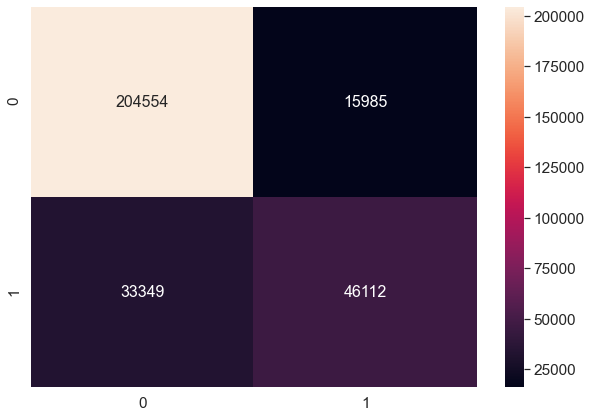

In [80]:
cm_reduced = confusion_matrix(y_train, y_train_reduced_pred)
df_cm_reduced = pd.DataFrame(cm_reduced, range(2), range(2))
sn.set(font_scale=1.4)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm_reduced, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [81]:
precision_score(y_train, y_train_reduced_pred)

0.7425801568513777

In [82]:
recall_score(y_train, y_train_reduced_pred)

0.5803098375303608

In [83]:
f1_score(y_train, y_train_reduced_pred)

0.6514926743808191

In [84]:
y_reduced_scores = cross_val_predict(sgd_clf, Xtrain_reduced, y_train, cv=5, method="predict") #decison_function not supported

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

In [85]:
precisions_red, recalls_red, thresholds_red = precision_recall_curve(y_train, y_reduced_scores)
recall_60_precision_red = recalls_red[np.argmax(precisions_red >= 0.60)]

In [86]:
fpr_red, tpr_red, thresholds_red = roc_curve(y_train, y_reduced_scores)

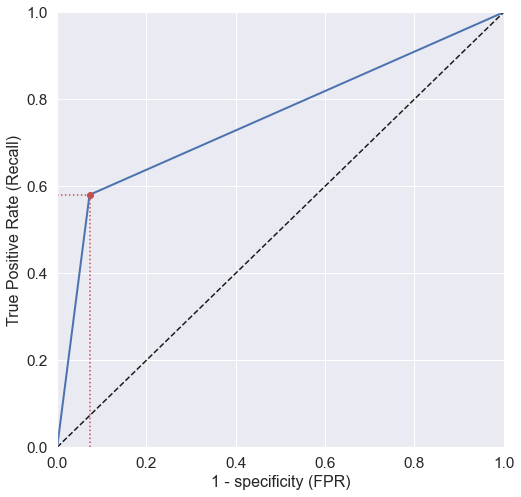

In [87]:
def plot_roc_curve(fpr_red, tpr_red, label=None):
    plt.plot(fpr_red, tpr_red, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('1 - specificity (FPR)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            
    
plt.figure(figsize=(8, 8))                                    
plot_roc_curve(fpr_red, tpr_red)
fpr_red_60 = fpr_red[np.argmax(tpr_red >= recall_60_precision_red)]           
plt.plot([fpr_red_60, fpr_red_60], [0., recall_60_precision_red], "r:")   
plt.plot([0.0, fpr_red_60], [recall_60_precision_red, recall_60_precision_red], "r:")  
plt.plot([fpr_red_60], [recall_60_precision_red], "ro")                                                  
plt.show()

In [ ]:
#DRAFT: check logistic regression on X_reduced

In [95]:
pcatest_80 = PCA(n_components=56)
Xtest_reduced = pcatest_80.fit_transform(X_test_final)

In [96]:
Xtest_reduced.shape

(200000, 56)

In [90]:
from sklearn.linear_model import LogisticRegression
log_reg_pca = LogisticRegression(solver="saga", max_iter= 1000, random_state=123)

In [91]:
%%time
log_reg_pca.fit(Xtrain_reduced, y_train.values.ravel())

CPU times: user 6.55 s, sys: 240 ms, total: 6.79 s
Wall time: 6.97 s


LogisticRegression(max_iter=1000, random_state=123, solver='saga')

In [97]:
predictions_logit_pca = pd.DataFrame(log_reg_pca.predict(Xtest_reduced))

In [100]:
test = pd.read_csv("/Users/fede.dicerbo/Desktop/practical2/test.csv", header=0)
id_test = pd.DataFrame(test[['id']])

In [101]:
y_pred_logitPCA = pd.concat([id_test, predictions_logit_pca], axis=1)

In [102]:
y_pred_logitPCA.to_csv('predictionlogitPCA.csv', index= False, header=['id','target']) #75.161% score from Kaggle, not better than without PCA

In [105]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf_gini_PCA = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, random_state=123)

In [106]:
%%time
rnd_clf_gini_PCA.fit(Xtrain_reduced, y_train)

<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 4min 1s, sys: 1.93 s, total: 4min 3s
Wall time: 4min 28s


RandomForestClassifier(max_leaf_nodes=20, random_state=123)

In [108]:
y_pred_rf_gini_PCA = pd.DataFrame(rnd_clf_gini_PCA.predict(Xtest_reduced))

In [109]:
predictions_rf_gini_PCA = pd.concat([id_test, y_pred_rf_gini_PCA], axis=1)

In [110]:
predictions_rf_gini_PCA.to_csv('predictionrf1_PCA.csv', index= False, header=['id','target']) #69.047% score on Kaggle

In [ ]:
#Without PCA:
#Logistic regression classifier - solver lbfgs did not converge, use saga to handle L1 and L2 penalties
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="saga", max_iter= 1000, random_state=123)

In [ ]:
%%time
log_reg.fit(X_train_final, y_train.values.ravel())

In [ ]:
predictions_logit = pd.DataFrame(log_reg.predict(X_test_final))

In [ ]:
test = pd.read_csv("/Users/fede.dicerbo/Desktop/practical2/test.csv", header=0)
id_test = pd.DataFrame(test[['id']])

In [ ]:
y_pred_logit = pd.concat([id_test, predictions_logit], axis=1)

In [ ]:
#print .csv sample predictions
y_pred_logit.to_csv('predictionlogit2.csv', index= False, header=['id','target']) #76.11% score on Kaggle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf_gini = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, random_state=123)

In [ ]:
%%time
rnd_clf_gini.fit(X_train_final, y_train)

In [ ]:
y_pred_rf_gini = pd.DataFrame(rnd_clf_gini.predict(X_test_final))

In [ ]:
predictions_rf_gini = pd.concat([id_test, y_pred_rf_gini], axis=1)

In [ ]:
#print .csv sample predictions
predictions_rf_gini.to_csv('predictionrf1.csv', index= False, header=['id','target'])  #71.614% score on Kaggle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', max_leaf_nodes=20, random_state=123)

In [ ]:
%%time
rnd_clf_entropy.fit(X_train_final, y_train)

In [ ]:
y_pred_rf_entropy = pd.DataFrame(rnd_clf_entropy.predict(X_test_final))

In [ ]:
predictions_rf_entropy = pd.concat([id_test, y_pred_rf_entropy], axis=1)

In [ ]:
predictions_rf_entropy.to_csv('predictionrf2.csv', index= False, header=['id','target']) #71.262% score on Kaggle